# Imortamos  qiskit 

In [1]:
from qiskit import *

## Creamos el circuito 

In [2]:
# Registro cuántico de 2 qubits
qr = QuantumRegister(2)
qr

QuantumRegister(2, 'q0')

In [3]:
# Registro clásico de 2 bits
cr = ClassicalRegister(2)
cr

ClassicalRegister(2, 'c0')

In [4]:
# Contruimos un circuito con estos 2
circuit = QuantumCircuit(qr, cr)

# Dibujamos el circuito 

In [5]:
%matplotlib inline

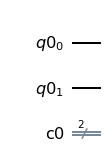

In [6]:
circuit.draw()

### Vemos 2 bits cuánticos y 2 bits clásicos
### Bit cuánticos (q0_0) y (q0_1)

##### Con el objetivo de crear "entanglement" (entrelazamiento cuántico) lo 1º es aplicar la puerta Hadamard en el primer qubit (q0_0) con ello logramos la "superposición" al aplicar el operador H produce que un qubit pase de un estado básico, |0> 0 |1>

In [7]:
circuit.h(qr[0])

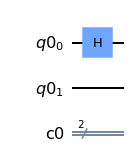

In [8]:
circuit.draw()

##### o incluso mejor visualizado... 

In [9]:
from qiskit.tools.visualization import plot_bloch_multivector

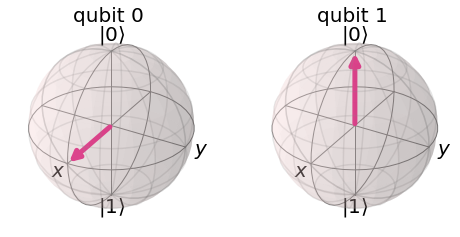

In [10]:
plot_bloch_multivector(circuit)

##### aparece la puerta Hadamard (Hadamard gate) tal y como se pudo apreciar ahora la puerta cx, que es una "controlled-x gate" y la puerta hace un NOT en qubit target si el qubit de control esta en estado 1 por defecto todos los qubits son inicializados a 0

##### En la siguiente ecuación
##### el control (qr[0]), el target (qr[1])

In [11]:
circuit.cx(qr[0], qr[1])

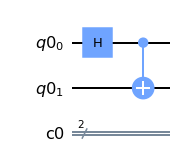

In [12]:
circuit.draw()

# Medición de los bits cuánticos 

##### Un experimento real termina por medir cada qubit. Sin medición no podemos obtener información acerca del estado

In [13]:
circuit.measure(qr,cr)

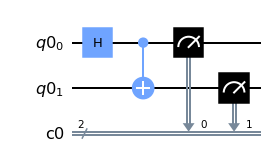

In [14]:
circuit.draw()

# Ejecutar el ejercicio en nuestro ordenador 

In [15]:
backend_simulator = Aer.get_backend("qasm_simulator")
backend_simulator

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


QasmSimulator('qasm_simulator')

In [16]:
# opción 1
job_simulator = execute(circuit, backend=backend_simulator)
job_simulator
# opción 2 (e incluso...)
# excute(circuit, backend=simulator, shost=1024)

In [17]:
result = job_simulator.result()
result

Result(backend_name='qasm_simulator', backend_version='0.11.1', qobj_id='ec6e8741-b7a2-44d5-acbe-a7fe26bfcde5', job_id='feaf9ea3-d651-442c-8df0-f49ddc14e3fc', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 484, '0x0': 540}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-85', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=1378232411, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 8, 'sample_measure_time': 0.002558571, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.009942561)], date=2023-02-26T16:01:09.23950

In [18]:
result.status

'COMPLETED'

In [19]:
# plot_histogram

In [20]:
from qiskit.tools.visualization import plot_histogram

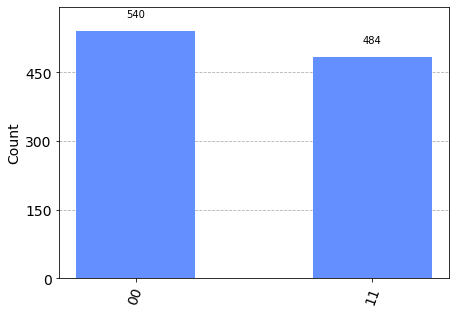

In [21]:
plot_histogram(result.get_counts(circuit))

# Desde el servidor de IBM 

In [22]:
from qiskit import IBMQ

In [23]:
IBMQ.save_account('')

configrc.store_credentials:WARNING:2023-02-26 16:01:20,308: Credentials already present. Set overwrite=True to overwrite.


In [24]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [25]:
provider = IBMQ.get_provider('ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [27]:
qcomp = provider.get_backend('ibmq_lima')
qcomp

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
job = execute(circuit, backend = qcomp)
job

In [29]:
from qiskit.tools.monitor import job_monitor

In [30]:
job_monitor(job)

Job Status: job has successfully run


In [31]:
result = job.result()
result

Result(backend_name='ibmq_lima', backend_version='1.0.45', qobj_id='94fcb495-cfa5-42cc-940e-155fbaeea330', job_id='63fb82656d831475344b6315', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1911, '0x1': 90, '0x2': 77, '0x3': 1922}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-85', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=done)], date=2023-02-26 16:22:44+00:00, status=Successful completion, header=QobjHeader(backend_name='ibmq_lima', backend_version='1.0.45'), execution_id='cb2b630a-b5f1-11ed-acad-b02628f7f59e', time_taken=2.7655601501464844, error=None, client_version={'qiskit': '0.39.2'})

# Segunda parte de la actividad
### Los Estados de Bell en Computación Cuántica

##### https://hmong.es/wiki/Bell_state
##### Los estados de Bell son una forma de vectores básicos entrelazados y normalizados. Esta normalización implica que la probabilidad general de que la partícula se encuentre en uno de los estados mencionados es 1:{\ Displaystyle \ langle \ Phi | \ Phi \ rangle = 1}. El entrelazamiento es un resultado de superposición independiente de la base .Debido a esta superposición, la medición del qubit lo colapsará en uno de sus estados básicos con una probabilidad determinada. Debido al entrelazamiento, la medición de un qubit asignará uno de los dos valores posibles al otro qubit instantáneamente, donde el valor asignado depende del estado de Bell en el que se encuentran los dos qubits. Los estados de Bell se pueden generalizar para representar estados cuánticos específicos de sistemas multi-qubit, como el estado GHZ para 3 o más subsistemas.

# Tercera parte de la actividad
### En el caso de Google se encuentra CIRQ como Framework para programar
Computación Cuántica.

# Alumno Daniel Rodriguez Amezaga

Cirq con Run in Google Colab

In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

import cirq_google

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.6/594.6 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━

## Qubits

La primera parte de la creación de un circuito cuántico es definir un conjunto de qubits (también conocido como registro cuántico) sobre los que actuar.

Cirq tiene tres formas principales de definir qubits:

* Cirq.NamedQubit: se utiliza para etiquetar los qubits con un nombre abstracto.
* Cirq.LineQubit: qubits etiquetados por número en una matriz lineal.
* Cirq.GridQubit`: qubits etiquetados por dos números en una red rectangular.

He aquí algunos ejemplos de definición de cada tipo de qubit.

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

In [2]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4, 5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

In [3]:
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

Compuertas y operaciones

El siguiente paso es utilizar los qubits para crear operaciones que puedan utilizarse en el circuito. Cirq tiene dos conceptos que es importante entender aquí:

    Una puerta es un efecto que se puede aplicar a un conjunto de qubits.
    Una operación es una puerta aplicada a un conjunto de qubits.

Por ejemplo, cirq.H es el Hadamard cuántico y es un objeto Puerta. cirq.H(cirq.LineQubit(1)) es un objeto Operación y es la puerta Hadamard aplicada a un qubit específico (qubit de línea número 1).

Cirq.X, cirq.Y y cirq.Z se refieren a las puertas Pauli de un qubit. cirq.CZ, cirq.CNOT, cirq.SWAP son algunas de las puertas comunes de dos qubits. cirq.measure es una macro para aplicar una MeasurementGate a un conjunto de qubits. Puedes encontrar más información, así como instrucciones sobre cómo crear tus propias puertas personalizadas, en la página de documentación de Gates.

Estos son algunos ejemplos de operaciones que se pueden realizar en puertas y operaciones:

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

In [4]:
# Example gates
cnot_gate = cirq.CNOT
pauli_z = cirq.Z

# Use exponentiation to get square root gates.
sqrt_x_gate = cirq.X**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Create two qubits at once, in a line.
q0, q1 = cirq.LineQubit.range(2)

# Example operations
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

# You can also use the gates you specified earlier.
cnot_op = cnot_gate(q0, q1)
pauli_z_op = pauli_z(q0)
sqrt_x_op = sqrt_x_gate(q0)
sqrt_sqrt_y_op = sqrt_sqrt_y(q0)

Circuitos y momentos

Ya está preparado para construir un circuito cuántico. Un circuito es una colección de momentos. Un Momento es una colección de Operaciones que actúan durante el mismo intervalo de tiempo abstracto. Cada operación debe aplicarse a un conjunto disjunto de qubits en comparación con cada una de las otras operaciones del momento. Un momento puede considerarse como un corte vertical de un diagrama de circuito cuántico.

Los circuitos pueden construirse de diferentes maneras. Por defecto, Cirq intentará deslizar tu operación en el Momento más temprano posible cuando la insertes. Puede utilizar la función append de dos maneras:

Añadiendo cada operación una a una:

In [5]:
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [6]:
circuit = cirq.Circuit()
ops = [cirq.H(q) for q in cirq.LineQubit.range(3)]
circuit.append(ops)
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [7]:
# Append with generator
circuit = cirq.Circuit()
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
print(circuit)
# Initializer with generator
print(cirq.Circuit(cirq.H(q) for q in cirq.LineQubit.range(3)))

0: ───H───

1: ───H───

2: ───H───
0: ───H───

1: ───H───

2: ───H───


In [8]:
print(cirq.Circuit(cirq.SWAP(q, q + 1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


In [9]:
# Creates each gate in a separate moment by passing an iterable of Moments instead of Operations.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


Circuitos y dispositivos

Una consideración importante cuando se utilizan dispositivos cuánticos reales es que a menudo hay restricciones en los circuitos que se pueden ejecutar en el hardware. Los objetos de dispositivo especifican estas restricciones y pueden utilizarse para validar tu circuito y asegurarte de que no contiene operaciones ilegales. Para más información sobre qué restricciones pueden especificar los objetos Device y cómo utilizarlos, consulte la página Dispositivos.

El siguiente ejemplo lo demuestra con el dispositivo Sycamore:

In [10]:
# Create some qubits.
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Create operations using the Sycamore gate, which is supported by the Sycamore device.
# However, create operations for both adjacent and non-adjacent qubit pairs.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print(e)

Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


Simulación

Los resultados de la aplicación de un circuito cuántico pueden calcularse mediante un Simulador. Cirq viene con un simulador que puede calcular los resultados de circuitos hasta un límite de 20 qubits. Se puede inicializar con cirq.Simulator().

Hay dos enfoques diferentes para utilizar un simulador:

    simulate(): Cuando se simula clásicamente un circuito, un simulador puede acceder directamente y ver la función de onda resultante. Esto es útil para depurar, aprender y entender cómo funcionarán los circuitos.
    ejecutar(): Cuando se utilizan dispositivos cuánticos reales, sólo podemos acceder al resultado final de un cálculo y debemos muestrear los resultados para obtener una distribución de resultados. Ejecutar el simulador como un muestreador imita este comportamiento y sólo devuelve cadenas de bits como salida.

A continuación, simule un "Estado de Bell" de 2 qubits:

In [11]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
samples = s.run(bell_circuit, repetitions=1000)

Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


### Simulación de máquina virtual

Cirq también proporciona la [Quantum Virtual Machine](/cirq/simulate/quantum_virtual_machine), que es una versión virtual simulada de dispositivos de hardware cuántico. Consta de dos componentes principales: 
1. Una [interfaz del motor virtual](/cirq/simulate/virtual_engine_interface) que permite verificar y ejecutar circuitos con la misma interfaz que tendría el hardware cuántico.
2. 2. Un conjunto de [modelos de ruido](/cirq/noise/representing_noise) que intentan reproducir de forma realista el ruido presente en los dispositivos de hardware cuántico reales de Google.

El QVM pretende servir como sustituto del hardware cuántico de Google, en dos casos: 
1. Ejecutar tu circuito en una QVM puede darte una aproximación de cómo funciona tu circuito bajo la influencia de un ruido similar al del hardware. Esto puede ser útil para ayudarte a reconfigurar o cambiar tu circuito para que se vea menos afectado por el ruido cuando se ejecute en el hardware cuántico real.
2. Durante el proceso de preparación antes de ejecutar el circuito en el hardware, puede utilizar sin problemas una QVM para probar que su flujo de trabajo o canalización funciona antes de cambiar finalmente a la interfaz de hardware casi idéntica.

## Visualización de resultados

Cuando se utiliza `run()` para obtener una distribución de muestras de las mediciones, se pueden graficar directamente las muestras simuladas como un histograma con `cirq.plot_state_histogram`.

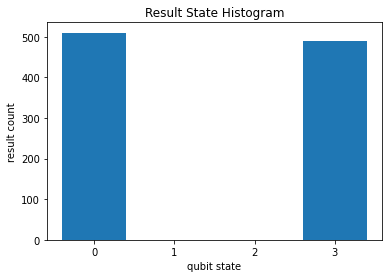

In [12]:
import matplotlib.pyplot as plt

cirq.plot_state_histogram(samples, plt.subplot())
plt.show()

Sin embargo, este histograma tiene algunos qubits vacíos, lo que puede resultar problemático si se trabaja con más qubits. Para graficar datos muestreados dispersos, primero obtén los `Counts` de tus resultados con su función `histogram()`, y pásalo a `cirq.plot_state_histogram`. Al recopilar los resultados en recuentos, se ignoran todos los estados de qubit que nunca se han visto.

Counter({0: 510, 3: 490})


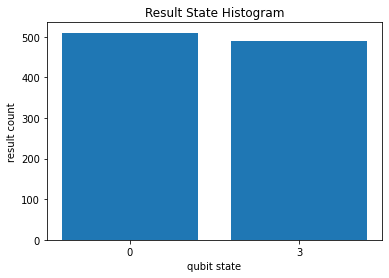

In [13]:
# Pull of histogram counts from the result data structure
counts = samples.histogram(key='result')
print(counts)

# Graph the histogram counts instead of the results
cirq.plot_state_histogram(counts, plt.subplot())
plt.show()

Un histograma sobre los estados que realmente se observaron puede ser a menudo más útil a la hora de analizar los resultados. Para obtener más información sobre las opciones disponibles para crear histogramas de resultados, consulte la página [Histogramas de estados](/cirq/simulate/state_histograms).

### Uso de barridos de parámetros

Los circuitos Cirq permiten que las puertas tengan símbolos como parámetros libres dentro del circuito.  Esto es especialmente útil para los algoritmos variacionales, que varían los parámetros dentro del circuito con el fin de optimizar una función de coste, pero puede ser útil en una variedad de circunstancias.

Para los parámetros, Cirq utiliza la biblioteca `sympy` para añadir `sympy.Symbol` como parámetros a las puertas y operaciones.  

Una vez que el circuito está completo, puedes rellenar los posibles valores de cada uno de estos parámetros con un `Sweep`.  Hay varias posibilidades que se pueden utilizar como barrido:

* `cirq.Puntos`: Una lista de valores especificados manualmente para un símbolo específico como una secuencia de floats.
* `cirq.Linspace`: Un barrido lineal desde un valor inicial hasta un valor final.
* `cirq.ListSweep`: Una lista de valores especificados manualmente para varios símbolos diferentes, especificados como una lista de diccionarios.
* `cirq.Zip` y `cirq.Product`: Los barridos pueden combinarse en forma de lista comprimiéndolos o mediante su producto cartesiano.

Un circuito parametrizado y un barrido pueden ejecutarse juntos utilizando el simulador u otro muestreador cambiando `run()` a `run_sweep()` y añadiendo el barrido como parámetro.

He aquí un ejemplo de barrido de un exponente de una puerta X:

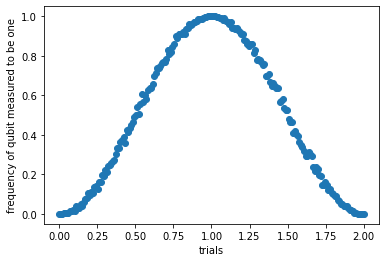

In [14]:
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.show()

## Matrices unitarias y descomposiciones

Muchas operaciones cuánticas tienen representaciones matriciales unitarias.  Se puede acceder a esta matriz aplicando `cirq.unitary(operation)` a esa `operación`.  Esto puede aplicarse a puertas, operaciones y circuitos que soporten este protocolo y devolverá la matriz unitaria que representa el objeto. Ver [Protocolos](/cirq/build/protocols) para más información sobre este y otros protocolos.

In [15]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


### Descomposiciones 

Muchas puertas pueden descomponerse en un circuito equivalente con operaciones y puertas más simples.  Esto se llama descomposición y se puede lograr con el protocolo `cirq.decompose`.  

Por ejemplo, una puerta Hadamard H puede descomponerse en puertas X e Y:

In [16]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


Otro ejemplo es la puerta Toffoli de 3 qubits, que equivale a una puerta X controlada-controlada.  Muchos dispositivos no admiten puertas de tres qubits, por lo que es importante descomponerlas en puertas de uno y dos qubits:

In [17]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


Lo anterior descompone el Toffoli en un conjunto más simple de puertas de un qubit y puertas CZ de dos qubits a costa de alargar considerablemente el circuito.

### Transformadores

El último concepto de este tutorial es el transformador.  Un transformador puede tomar un circuito y modificarlo.  Por lo general, esto implicará la combinación o modificación de las operaciones para que sea más eficiente y más corto, aunque un transformador puede, en teoría, hacer cualquier tipo de manipulación del circuito.

Por ejemplo, el transformador `cirq.merge_single_qubit_gates_to_phxz` tomará operaciones consecutivas de un solo qubit y las fusionará en una única operación `PhasedXZ`.

In [18]:
q = cirq.GridQubit(1, 1)
c = cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print(c)
c = cirq.merge_single_qubit_gates_to_phxz(c)
print(c)

(1, 1): ───X^0.25───Y^0.25───T───
(1, 1): ───PhXZ(a=0.304,x=0.333,z=0.142)───


# Cuarta parte de la actividad

### Certificaciones SQL (hasta 1 puntos)
### Busca si existe alguna certificación relacionada con PostgreSQL, En caso de que exista añade Link. Si no existe puedes argumentarlo.
Si no hubiera, puedes añadir otro tipo de certificaciones SQL si existiera. 

### Desde septiembre de 2020 Abatic Soluciones Tecnológicas acompañará a EnterpriseDB como empresa con certificaciones en PostgreSQL on-line.
### https://www.abatic.es/donde-puedo-certificarme-en-postgresql/
### https://www.enterprisedb.com/training/postgres-certification

### Certificaciones NoSQL (hasta 1 puntos)

### Recuerdo que la primera baser de datos NoSQL que probe fue CassandraDB, busqué una certificación y encontre esta:
### https://openwebinars.net/cursos/cassandra/
### https://www.udemy.com/course/apache-cassandra/

### Certificaciones en BIG DATA (hasta 1 puntos)

### Me parece interesante esta certificación en relación a la lección y lo aprendido además se usa python.
### Certificado Profesional de Ciencia de Datos de IBM
### El Certificado Profesional de Ciencia de Datos de IBM consta de nueve cursos sobre ciencia de datos, herramientas de código abierto, metodología de ciencia de datos, Python, Bases de datos y SQL, análisis de datos, visualización de datos, aprendizaje automático y un capstone final de ciencia de datos aplicada. El trabajo del curso de certificación se lleva a cabo en línea a través de Coursera con un horario flexible y toma un promedio de tres meses para completar, pero eres libre de tomar más o menos tiempo. El curso incluye proyectos prácticos para ayudarle a construir una cartera para mostrar sus talentos de ciencia de datos a los posibles empleadores.
    Coste: gratis.
    Lugar: online.
    Duración: a su ritmo
    Caducidad: las credenciales no caducan.
### https://es.coursera.org/professional-certificates/certificado-profesional-de-ciencia-de-datos-de-ibm
### https://www.ciospain.es/liderazgo/12-certificaciones-de-ciencia-de-datos-que-valen-la-pena